<a href="https://colab.research.google.com/github/JinseokCodeDiary/first-repository/blob/master/Python_quest/datathon_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder # station 칼럼 요소 고유 숫자 부여 위해 import함
addr_df = pd.read_csv('/content/addr_lat_lon.csv')
distance_df2 = pd.read_csv('/content/distance_df2.csv')
train = pd.read_csv('/content/train.csv')

label_encoder = LabelEncoder()

In [4]:
addr_df

,apartment_id,full_jibun_addr,latitude,longitude
0,7622,서울특별시 신교동 6-13,37.583581,126.967866
1,5399,서울특별시 필운동 142,37.576333,126.969340
2,3578,서울특별시 필운동 174-1,37.578217,126.969724
3,10957,서울특별시 내수동 95,37.574180,126.970562
4,10639,서울특별시 내수동 110-15,37.573278,126.970461
...,...,...,...,...
12437,5387,부산광역시 괘법동 521-1,35.165284,128.979748
12438,4357,부산광역시 기장읍 대라리 125-6,35.241942,129.214835
12439,5856,부산광역시 기장읍 대라리 33-9,35.242466,129.217778
12440,335,부산광역시 기장읍 대라리 94-8,35.241506,129.218164


In [5]:
distance_df2

,full_jibun_addr,station,distance_km
0,부산광역시 영주동 587,부산역,0.386600
1,부산광역시 영주동 5,부산역,0.382109
2,부산광역시 부평동4가 45,토성,0.329591
3,부산광역시 신창동2가 22,자갈치,0.424347
4,부산광역시 동광동5가 16-11,중앙,0.439876
...,...,...,...
7307,서울특별시 석촌동 271-14,석촌,0.477385
7308,서울특별시 가락동 166-10,개롱,0.151257
7309,서울특별시 천호동 121-32,길동,0.428807
7310,서울특별시 천호동 571,강동,0.165301


In [6]:
len(distance_df2['station'].unique())

386

In [7]:
station_apt = pd.merge(addr_df, distance_df2, on='full_jibun_addr', how='left')

In [8]:
station_apt

,apartment_id,full_jibun_addr,latitude,longitude,station,distance_km
0,7622,서울특별시 신교동 6-13,37.583581,126.967866,NaN,NaN
1,5399,서울특별시 필운동 142,37.576333,126.969340,경복궁,0.374643
2,3578,서울특별시 필운동 174-1,37.578217,126.969724,경복궁,0.432512
3,10957,서울특별시 내수동 95,37.574180,126.970562,경복궁,0.315195
4,10639,서울특별시 내수동 110-15,37.573278,126.970461,경복궁,0.386544
...,...,...,...,...,...,...
13272,5387,부산광역시 괘법동 521-1,35.165284,128.979748,괘법르네시떼,0.295028
13273,4357,부산광역시 기장읍 대라리 125-6,35.241942,129.214835,NaN,NaN
13274,5856,부산광역시 기장읍 대라리 33-9,35.242466,129.217778,NaN,NaN
13275,335,부산광역시 기장읍 대라리 94-8,35.241506,129.218164,NaN,NaN


In [9]:
duplicate_names = station_apt[station_apt.duplicated(subset=['full_jibun_addr'], keep=False)]
duplicate_names

,apartment_id,full_jibun_addr,latitude,longitude,station,distance_km
13,3080,서울특별시 창신동 328-17,37.572268,127.015188,동대문,0.488913
14,3080,서울특별시 창신동 328-17,37.572268,127.015188,동묘앞,0.116396
23,12042,서울특별시 익선동 55,37.575112,126.990058,종로3가,0.419102
24,12042,서울특별시 익선동 55,37.575112,126.990058,안국,0.434120
25,8840,서울특별시 익선동 30-6,37.575102,126.989137,종로3가,0.454300
...,...,...,...,...,...,...
13261,6842,부산광역시 민락동 774,35.167566,129.119738,민락,0.181189
13264,8048,부산광역시 광안동 44-16,35.167815,129.118489,수영,0.383535
13265,8048,부산광역시 광안동 44-16,35.167815,129.118489,민락,0.297748
13269,2535,부산광역시 괘법동 547-20,35.161049,128.986480,사상,0.149731


In [10]:
duplicate_names1 = station_apt[station_apt.duplicated(subset=['apartment_id'], keep=False)]
duplicate_names1

,apartment_id,full_jibun_addr,latitude,longitude,station,distance_km
13,3080,서울특별시 창신동 328-17,37.572268,127.015188,동대문,0.488913
14,3080,서울특별시 창신동 328-17,37.572268,127.015188,동묘앞,0.116396
23,12042,서울특별시 익선동 55,37.575112,126.990058,종로3가,0.419102
24,12042,서울특별시 익선동 55,37.575112,126.990058,안국,0.434120
25,8840,서울특별시 익선동 30-6,37.575102,126.989137,종로3가,0.454300
...,...,...,...,...,...,...
13261,6842,부산광역시 민락동 774,35.167566,129.119738,민락,0.181189
13264,8048,부산광역시 광안동 44-16,35.167815,129.118489,수영,0.383535
13265,8048,부산광역시 광안동 44-16,35.167815,129.118489,민락,0.297748
13269,2535,부산광역시 괘법동 547-20,35.161049,128.986480,사상,0.149731


In [11]:
station_apt['station_label'] = label_encoder.fit_transform(station_apt['station']) #각 역이름 숫자로 변환

In [12]:
station_apt

,apartment_id,full_jibun_addr,latitude,longitude,station,distance_km,station_label
0,7622,서울특별시 신교동 6-13,37.583581,126.967866,NaN,NaN,386
1,5399,서울특별시 필운동 142,37.576333,126.969340,경복궁,0.374643,21
2,3578,서울특별시 필운동 174-1,37.578217,126.969724,경복궁,0.432512,21
3,10957,서울특별시 내수동 95,37.574180,126.970562,경복궁,0.315195,21
4,10639,서울특별시 내수동 110-15,37.573278,126.970461,경복궁,0.386544,21
...,...,...,...,...,...,...,...
13272,5387,부산광역시 괘법동 521-1,35.165284,128.979748,괘법르네시떼,0.295028,36
13273,4357,부산광역시 기장읍 대라리 125-6,35.241942,129.214835,NaN,NaN,386
13274,5856,부산광역시 기장읍 대라리 33-9,35.242466,129.217778,NaN,NaN,386
13275,335,부산광역시 기장읍 대라리 94-8,35.241506,129.218164,NaN,NaN,386


In [13]:
station_apt1 = station_apt.drop(axis=1,columns=['station', 'station_label']) # station 칼럼 삭제 - 역세권인가 거리가 얼마나 가까운지가 중요
station_apt1 = station_apt1.drop(axis=1,columns=['full_jibun_addr']) # full_jibun_addr 칼럼 삭제- apartment_id와 동일하므로 삭제
station_apt1 = station_apt1.drop(axis=1,columns=['latitude', 'longitude']) # apartment_id 칼럼 삭제- station label했기 때문에 필요없음
station_apt1

,apartment_id,distance_km
0,7622,NaN
1,5399,0.374643
2,3578,0.432512
3,10957,0.315195
4,10639,0.386544
...,...,...
13272,5387,0.295028
13273,4357,NaN
13274,5856,NaN
13275,335,NaN


In [14]:
station_apt1[station_apt1['apartment_id']==12]

,apartment_id,distance_km
5525,12,0.392534
5526,12,0.487013


In [15]:
station_apt1[station_apt1['apartment_id']==0]

,apartment_id,distance_km
697,0,0.127975


In [16]:
station_apt1[station_apt1['apartment_id']==1]

,apartment_id,distance_km
132,1,NaN


In [17]:
apartment_counts = station_apt1.groupby('apartment_id')['distance_km'].count().reset_index()
apartment_counts.columns = ['apartment_id', 'count']
apartment_counts

,apartment_id,count
0,0,1
1,1,0
2,2,0
3,5,1
4,6,1
...,...,...
12437,12654,0
12438,12655,0
12439,12656,0
12440,12657,0


In [18]:
td = pd.merge(train, apartment_counts, on='apartment_id', how='left')
td

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,count
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002.0,200801.0,21~31,2.0,37500.0,0.0
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973.0,200801.0,1~10,6.0,20000.0,1.0
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007.0,200801.0,1~10,6.0,38500.0,1.0
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003.0,200801.0,11~20,15.0,118000.0,1.0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004.0,200801.0,21~31,3.0,120000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177322,177322,11478,서울특별시,하계동,284,한신1,하계동 284 한신1,27.00,1988.0,200802.0,11~20,10.0,10950.0,1.0
177323,177323,9460,서울특별시,하계동,273,장미(시영6),하계동 273 장미(시영6),43.41,1989.0,200802.0,11~20,3.0,15000.0,1.0
177324,177324,11478,서울특별시,하계동,284,한신1,하계동 284 한신1,27.00,1988.0,200802.0,11~20,12.0,10950.0,1.0
177325,177325,4593,서울특별시,하계동,280,미성,하계동 280 미성,72.17,1989.0,200802.0,11~20,15.0,30300.0,1.0


In [19]:
td['transaction_date'].unique()

array(['21~31', '1~10', '11~20', '21~29', '21~30', '21~28', nan],
      dtype=object)

In [20]:
td['transaction_date_encoded'] = td['transaction_date'].map({'1~10': 0, '11~20': 1, '21~31' : 2,  '21~29' : 2, '21~28' : 2, '21~30': 2})
td.drop('transaction_date', axis=1, inplace=True)
td

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,count,transaction_date_encoded
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002.0,200801.0,2.0,37500.0,0.0,2.0
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973.0,200801.0,6.0,20000.0,1.0,0.0
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007.0,200801.0,6.0,38500.0,1.0,0.0
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003.0,200801.0,15.0,118000.0,1.0,1.0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004.0,200801.0,3.0,120000.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177322,177322,11478,서울특별시,하계동,284,한신1,하계동 284 한신1,27.00,1988.0,200802.0,10.0,10950.0,1.0,1.0
177323,177323,9460,서울특별시,하계동,273,장미(시영6),하계동 273 장미(시영6),43.41,1989.0,200802.0,3.0,15000.0,1.0,1.0
177324,177324,11478,서울특별시,하계동,284,한신1,하계동 284 한신1,27.00,1988.0,200802.0,12.0,10950.0,1.0,1.0
177325,177325,4593,서울특별시,하계동,280,미성,하계동 280 미성,72.17,1989.0,200802.0,15.0,30300.0,1.0,1.0


In [21]:
len(td['apt'].unique())

1863

In [22]:
len(td['addr_kr'].unique())

2083

In [23]:
len(td['jibun'].unique())

1755

In [24]:
len(td['dong'].unique())

169

In [25]:
df_encoded = pd.get_dummies(td, columns=['city','dong'])
df_encoded

,transaction_id,apartment_id,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,...,dong_홍익동,dong_화양동,dong_황학동,dong_회기동,dong_회현동1가,dong_회현동2가,dong_효창동,dong_후암동,dong_휘경동,dong_흥인동
0,0,7622,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002.0,200801.0,2.0,37500.0,...,False,False,False,False,False,False,False,False,False,False
1,1,5399,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973.0,200801.0,6.0,20000.0,...,False,False,False,False,False,False,False,False,False,False
2,2,3578,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007.0,200801.0,6.0,38500.0,...,False,False,False,False,False,False,False,False,False,False
3,3,10957,95,파크팰리스,내수동 95 파크팰리스,146.39,2003.0,200801.0,15.0,118000.0,...,False,False,False,False,False,False,False,False,False,False
4,4,10639,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004.0,200801.0,3.0,120000.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177322,177322,11478,284,한신1,하계동 284 한신1,27.00,1988.0,200802.0,10.0,10950.0,...,False,False,False,False,False,False,False,False,False,False
177323,177323,9460,273,장미(시영6),하계동 273 장미(시영6),43.41,1989.0,200802.0,3.0,15000.0,...,False,False,False,False,False,False,False,False,False,False
177324,177324,11478,284,한신1,하계동 284 한신1,27.00,1988.0,200802.0,12.0,10950.0,...,False,False,False,False,False,False,False,False,False,False
177325,177325,4593,280,미성,하계동 280 미성,72.17,1989.0,200802.0,15.0,30300.0,...,False,False,False,False,False,False,False,False,False,False


In [26]:
df_encoded.columns

Index(['transaction_id', 'apartment_id', 'jibun', 'apt', 'addr_kr',
       'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
       'floor', 'transaction_real_price',
       ...
       'dong_홍익동', 'dong_화양동', 'dong_황학동', 'dong_회기동', 'dong_회현동1가',
       'dong_회현동2가', 'dong_효창동', 'dong_후암동', 'dong_휘경동', 'dong_흥인동'],
      dtype='object', length=181)

In [27]:
df_encoded.drop(['jibun', 'apartment_id', 'transaction_id', 'apt','addr_kr'], axis=1, inplace=True)

In [28]:
df_encoded

,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,count,transaction_date_encoded,city_서울특별시,dong_갈월동,dong_견지동,...,dong_홍익동,dong_화양동,dong_황학동,dong_회기동,dong_회현동1가,dong_회현동2가,dong_효창동,dong_후암동,dong_휘경동,dong_흥인동
0,84.82,2002.0,200801.0,2.0,37500.0,0.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.17,1973.0,200801.0,6.0,20000.0,1.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,84.74,2007.0,200801.0,6.0,38500.0,1.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,146.39,2003.0,200801.0,15.0,118000.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,194.43,2004.0,200801.0,3.0,120000.0,1.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177322,27.00,1988.0,200802.0,10.0,10950.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
177323,43.41,1989.0,200802.0,3.0,15000.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
177324,27.00,1988.0,200802.0,12.0,10950.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
177325,72.17,1989.0,200802.0,15.0,30300.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
df_encoded['count'].fillna(0, inplace=True)
missing_category = df_encoded[df_encoded['transaction_real_price'].isna()]
missing_category
df_encoded = df_encoded.dropna()
df_encoded

,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,count,transaction_date_encoded,city_서울특별시,dong_갈월동,dong_견지동,...,dong_홍익동,dong_화양동,dong_황학동,dong_회기동,dong_회현동1가,dong_회현동2가,dong_효창동,dong_후암동,dong_휘경동,dong_흥인동
0,84.82,2002.0,200801.0,2.0,37500.0,0.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.17,1973.0,200801.0,6.0,20000.0,1.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,84.74,2007.0,200801.0,6.0,38500.0,1.0,0.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,146.39,2003.0,200801.0,15.0,118000.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,194.43,2004.0,200801.0,3.0,120000.0,1.0,2.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177321,113.51,1999.0,200802.0,16.0,55000.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
177322,27.00,1988.0,200802.0,10.0,10950.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
177323,43.41,1989.0,200802.0,3.0,15000.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
177324,27.00,1988.0,200802.0,12.0,10950.0,1.0,1.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
rows_with_nan = df_encoded[df_encoded.isna().any(axis=1)]
rows_with_nan

,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,count,transaction_date_encoded,city_서울특별시,dong_갈월동,dong_견지동,...,dong_홍익동,dong_화양동,dong_황학동,dong_회기동,dong_회현동1가,dong_회현동2가,dong_효창동,dong_후암동,dong_휘경동,dong_흥인동


In [31]:
df_encoded.isna()

,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,count,transaction_date_encoded,city_서울특별시,dong_갈월동,dong_견지동,...,dong_홍익동,dong_화양동,dong_황학동,dong_회기동,dong_회현동1가,dong_회현동2가,dong_효창동,dong_후암동,dong_휘경동,dong_흥인동
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177321,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
177322,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
177323,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
177324,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df_encoded = df_encoded.astype(int)

In [33]:
df_train = df_encoded.drop(['transaction_real_price'], axis=1)

In [34]:
print(df_train.columns)

Index(['exclusive_use_area', 'year_of_completion', 'transaction_year_month',
       'floor', 'count', 'transaction_date_encoded', 'city_서울특별시', 'dong_갈월동',
       'dong_견지동', 'dong_공릉동',
       ...
       'dong_홍익동', 'dong_화양동', 'dong_황학동', 'dong_회기동', 'dong_회현동1가',
       'dong_회현동2가', 'dong_효창동', 'dong_후암동', 'dong_휘경동', 'dong_흥인동'],
      dtype='object', length=175)


In [35]:
print(df_encoded.columns)

Index(['exclusive_use_area', 'year_of_completion', 'transaction_year_month',
       'floor', 'transaction_real_price', 'count', 'transaction_date_encoded',
       'city_서울특별시', 'dong_갈월동', 'dong_견지동',
       ...
       'dong_홍익동', 'dong_화양동', 'dong_황학동', 'dong_회기동', 'dong_회현동1가',
       'dong_회현동2가', 'dong_효창동', 'dong_후암동', 'dong_휘경동', 'dong_흥인동'],
      dtype='object', length=176)


In [36]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import numpy as np

In [37]:
# X = df_encoded[df_train.columns]
# y = df_encoded['transaction_real_price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.transform(X_test)

# def build_model():
#     model = keras.Sequential([
#         keras.layers.Dense(128, activation='relu'),
#         keras.layers.Dense(128, activation='relu'),
#         keras.layers.Dense(1)
#     ])
#     model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#     return model
# all_mae_historys =[]
# k = 1
# num_val_samples = len(X_train) // k
# num_epochs = 300
# all_scores = []
# for i in range(k):
#     print('처리중인 폴드 #', i)
#     val_data = X_train_normalized[i * num_val_samples: (i + 1) * num_val_samples]
#     val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
#     partial_train_data = np.concatenate(
#         [X_train_normalized[:i * num_val_samples],
#          X_train_normalized[(i + 1) * num_val_samples:]],
#         axis=0)
#     partial_train_targets = np.concatenate(
#         [y_train[:i * num_val_samples],
#          y_train[(i + 1) * num_val_samples:]],
#         axis=0)
#     model = build_model()
#     history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
#     # val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#     mae_history = history.history['mae']
#     all_mae_historys.append(mae_history)
#     # all_scores.append(val_mae)

# average_mae_history = [np.mean([x[i] for x in all_mae_historys]) for i in range(num_epochs)]

# import matplotlib.pyplot as plt
# plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()



In [39]:
# X = df_encoded[df_train.columns]
# y = df_encoded['transaction_real_price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.transform(X_test)
# num_epochs = 100
# def build_model():
#     model = keras.Sequential([
#         keras.layers.Dense(512, activation='relu'),
#         keras.layers.Dense(512, activation='relu'),
#         keras.layers.Dense(1)
#     ])
#     model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#     return model
# model = build_model()
# history = model.fit(X_train_normalized, y_train, epochs=num_epochs, batch_size=16, verbose=0)

# mae_history = history.history['mae']
# import matplotlib.pyplot as plt
# plt.plot(range(1, len(mae_history) + 1), mae_history)
# plt.xlabel('Epochs')
# plt.ylabel('Validation MAE')
# plt.show()

KeyboardInterrupt: 

In [ ]:
X = df_encoded[df_train.columns]
y = df_encoded['transaction_real_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
num_epochs = 100

model = keras.Sequential([
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dense(1024, activation='relu'),
        keras.layers.Dense(1)
        ])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train_normalized, y_train, epochs=num_epochs, batch_size=32, verbose=0)

mae_history = history.history['mae']

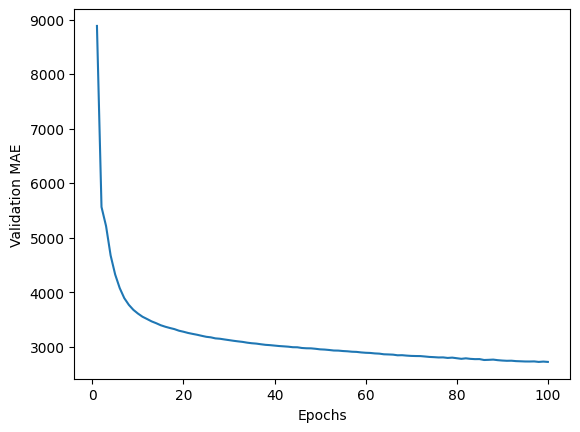

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

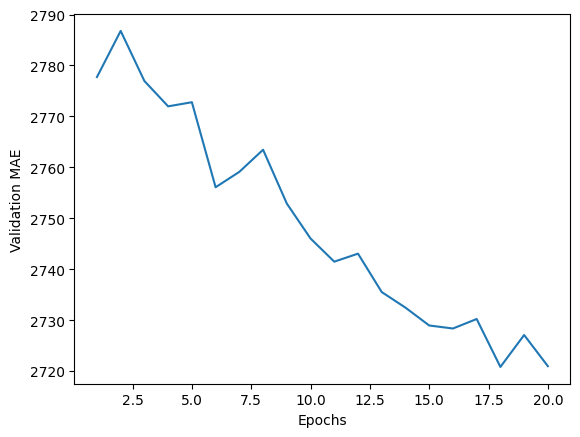

In [42]:
truncated_mae_history = mae_history[80:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [43]:
model = build_model()
model.fit(X_train_normalized, y_train, epochs=100, batch_size=32, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test_normalized, y_test)

1109/1109 [==============================] - 3s 3ms/step - loss: 55994360.0000 - mae: 3076.8674
